## Lyrics Analyzer

In [2]:
import pandas as pd
from lyrics_tool import Lyrics_Tool
l = Lyrics_Tool()

Enter Genius API Key: ········


In [3]:
# connect to MySQL database
l.connect()

User ID: wesley
Password: ········


In [12]:
song = 'happy'
artist = 'pharrell williams'

In [13]:
# check if song lyrics contain explicit words
l.vet(song,artist)

Searching for "happy" by pharrell williams...
Done.

Clean lyrics


True

In [14]:
# show data from clean lyrics table
l.data()

,Song,Artist,Clean
SongID,,,
1,God's Plan,Drake,0
2,SAD!,XXXTENTACION,0
3,rockstar,Post Malone,0
4,Psycho,Post Malone,0
5,In My Feelings,Drake,0
...,...,...,...
2392,No Brainer,DJ Khaled,0
2393,Nothing Breaks Like a Heart,Mark Ronson,1
2394,Kills You Slowly,The Chainsmokers,0


In [15]:
# get unique words and count
data = l.unique_word_count(song,artist)

# show 15 most common words in song
data.head(15)

Searching for "happy" by pharrell williams...
Done.


,count
word,
you,39
im,26
clap,24
if,24
along,24
happy,24
because,24
like,19
feel,18


In [16]:
l.show_lyrics(song,artist)

Searching for "happy" by pharrell williams...
Done.
[Produced by Pharrell Williams]

[Verse 1]
It might seem crazy what I'm 'bout to say
Sunshine she's here, you can take a break
I'm a hot air balloon that could go to space
With the air, like I don't care, baby, by the way

[Chorus]
(Because I'm happy)
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you
(Because I'm happy)
Clap along if you feel like that's what you wanna do

[Verse 2]
Here come bad news, talking this and that (Yeah!)
Well, give me all you got, don't hold it back (Yeah!)
Well, I should probably warn ya, I'll be just fine (Yeah!)
No offense to you, don’t waste your time, here's why

[Chorus]
(Because I'm happy)
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happines

## Database Analysis

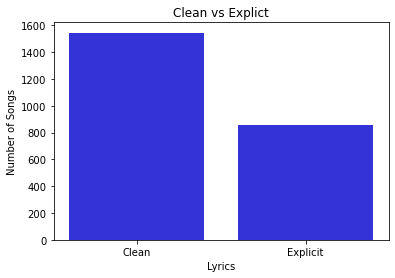

In [10]:
l.dashboard()

In [18]:
# load data into pandas dataframe
df = l.data()

In [19]:
# total entires in database
len(df)

2396

In [20]:
# top five artists in database
df.groupby(['Artist']).count()['Clean'].sort_values(ascending=False).head()

Artist
Katy Perry          23
Drake               23
The Chainsmokers    20
Ed Sheeran          20
Rihanna             17
Name: Clean, dtype: int64

In [21]:
# percentage of songs in database with clean lyrics
clean_values = df['Clean'].value_counts()[1] 
clean_percent = (clean_values / df['Clean'].value_counts().sum()*100).round(2)
print(str(clean_percent)+" % clean lyrics")

64.27 % clean lyrics
